# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Создание датафрейма
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df_old = df

In [3]:
# Вывод основной информации
display(df.info())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


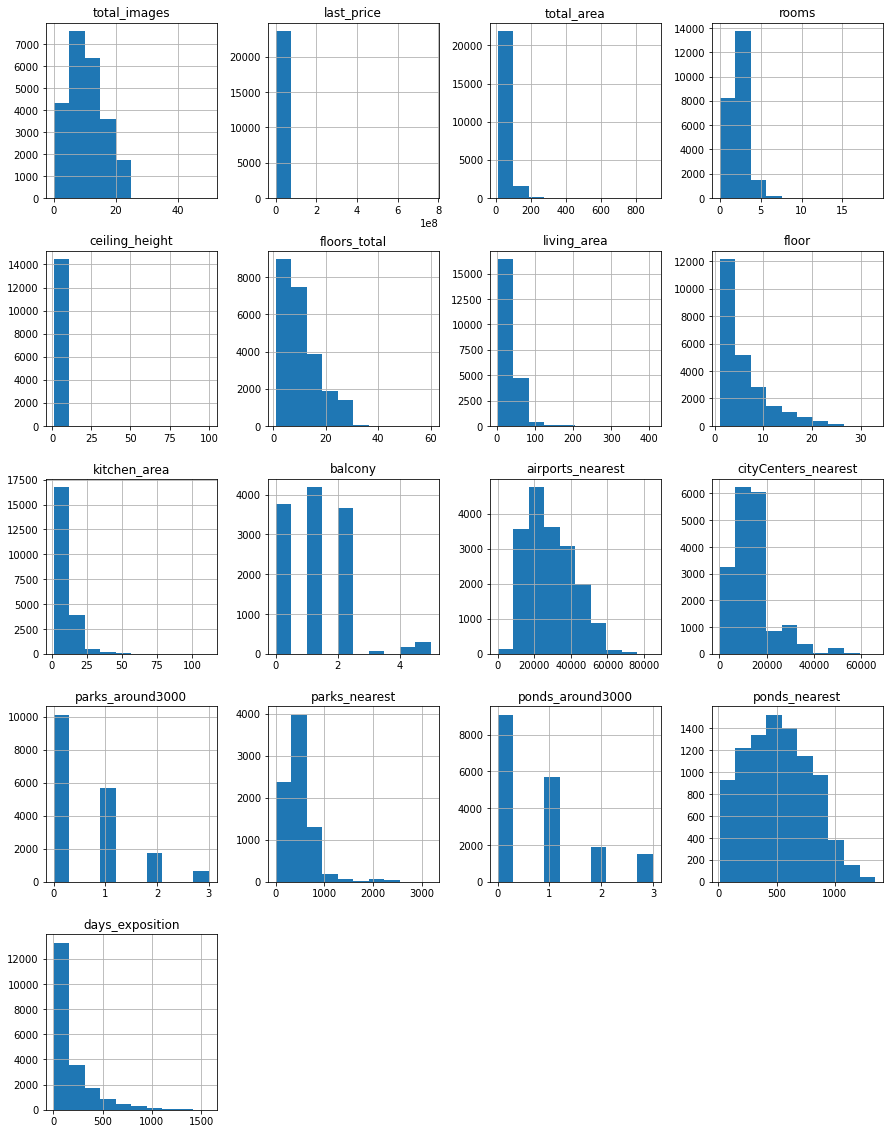

In [4]:
# Вывод хистограм
df.hist(figsize=(15, 20));

Вывод: По большинству графиков трудно судить об общем выводе, т.к. основная информация, которая меня интересует, очень некоректно отображается из-за выбросов, которые растягивают графики направо.

Также есть пропуски в "главных" столбцах данных, где их необходимо минимизировать и необходимо перевести отдельные столбцы в другой тип данных

### Предобработка данных

In [5]:
# Определяем пропущенные значения
display(df.isna().sum())
# Определяем процент пропущенных значений
display(df.isna().mean())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [7]:
display(df['ceiling_height'].describe())
"""Помимо большого количества пропусков, меня настараживает тот факт, что существует квартиры с потолками 1 метр,
и существуют квартиры с потолками 100 метров. Исходя из информации, которую изучил в интернете, могу предпологать,
что значения в датафрейме сделаны с опечатками, поэтому приведу их в более реальному виду"""
# Квартиры бывают от двух метров, поэтому значения ниже 2, умножу на 2.
df.loc[df['ceiling_height'] < 2, 'ceiling_height'] *= 2
# Рекордные значения потолков на квартир найти не смог, поэтому предположу, что значения могут быть не больше 20
df.loc[df['ceiling_height'] > 20, 'ceiling_height'] /= 10
# Заполняем пропуски медианным значением
df['ceiling_height'] = df['ceiling_height'].fillna(df.loc[df['ceiling_height'] > 0, 'ceiling_height'].median())
display(df['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

count    23699.000000
mean         2.699647
std          0.276624
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

In [8]:
# Заполняю пропуски медианным значением
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

In [9]:
# И здесь заполняю пропуски медианным значением
df['living_area'] = df['living_area'].fillna(df['living_area'].median())
df = df.loc[df['living_area']<100]

In [10]:
# Убираю аномальные значения и проверяю, чтобы потеря аномальных значений не превышала 10-ти процентов
df = df.loc[df['rooms']<8]

In [11]:
# Аналогично верхнему
df = df.loc[df['last_price']<50000000]

In [12]:
# По этому пункту, если нет значения, значит по стандарту должен стоять False
df['is_apartment'] = df['is_apartment'].fillna(False)

In [14]:
# При отсутствии значений данных по балконам, делаем вывод, что балконов нет
df['balcony'] = df['balcony'].fillna(0)

In [15]:
# Тут кроме "неизвестности", ничем нельзя заполнить пустые данные
df['locality_name'] = df['locality_name'].fillna('Неизвестно')

In [ ]:
# Устраняю неявные дубликаты
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок станции', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок', 'поселок')

In [17]:
# Следующие значения могут принимать только целые числа, поэтому перевожу в INT
for i in ['floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',\
         'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']:
    try:
        df[i] = df[i].astype('int')
    except:
        pass

In [18]:
# Перевожу object в datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
# Проверяю аномальные значения
display(df.describe())
display(1-(df.shape[0]/df_old.shape[0]))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23275.000000,2.327500e+04,23275.000000,23275.000000,23275.000000,23275.000000,23275.000000,23275.000000,21026.000000,23275.000000,17745.000000,17765.000000,17766.000000,7781.000000,17766.000000,8802.000000,20200.000000
mean,9.826466,5.778954e+06,57.429853,2.012331,2.691936,10.736756,32.323080,5.912610,10.296969,0.594887,28860.892364,14383.754123,0.595069,493.735638,0.754700,521.834583,178.645099
std,5.657690,4.453319e+06,25.784423,0.961300,0.264677,6.606411,15.021212,4.906115,5.169339,0.960400,12724.363273,8571.641752,0.787352,344.606869,0.927759,277.293873,217.661753
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18475.000000,9595.000000,0.000000,288.000000,0.000000,301.250000,44.000000
50%,9.000000,4.600000e+06,51.300000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26895.000000,13222.000000,0.000000,456.000000,0.000000,506.000000,94.000000
75%,14.000000,6.600000e+06,68.000000,3.000000,2.700000,16.000000,40.150000,8.000000,11.800000,1.000000,37412.000000,16408.000000,1.000000,614.000000,1.000000,733.000000,228.000000
max,50.000000,4.950000e+07,494.100000,7.000000,20.000000,60.000000,99.900000,33.000000,75.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


0.017891050255285035

Вывод: Пропуски можно обьяснить в первую очередь человеческим фактором. Также люди не могли знать точные данные по высоте потолков и площади жилья и отдельных помещений. Касательно пропусков по последним пунктам, могу судить только по себе, что такие данные, я сразу не смог бы тоже ввести, поэтому основные пользователи, посчитали, что тоже вводить не будут.

### Посчитайте и добавьте в таблицу новые столбцы

In [20]:
# Добавляю столбец с ценой за кв/м
df['price_m2'] = df['last_price'] / df['living_area']

In [21]:
# Добавляю столбец с днем недели публикации обьявления
df['day_of_week_publish'] = pd.DatetimeIndex(df['first_day_exposition']).weekday

In [22]:
# Добавляю столбец с месяцем публикации обьявления
df['month_publish'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [23]:
# Добавляю столбец с годом публикации обьявления
df['year_publish'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [24]:
# Добавляю столбец с типом этажа квартиры
def floor_calling(rows_values):
    """Функция, которая получает значения этажа и количества этажей в доме и выдает 'тип этажа квартиры'"""
    floor = rows_values['floor']
    floor_house = rows_values['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floor_house:
        return 'последний'
    else:
        return 'другой'
    
df['floor_type'] = df.apply(floor_calling, axis=1)

In [25]:
# Добавляю столбец расстояние до центра в км
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] // 1000).round(0)

### Провожу исследовательский анализ данных

total_area


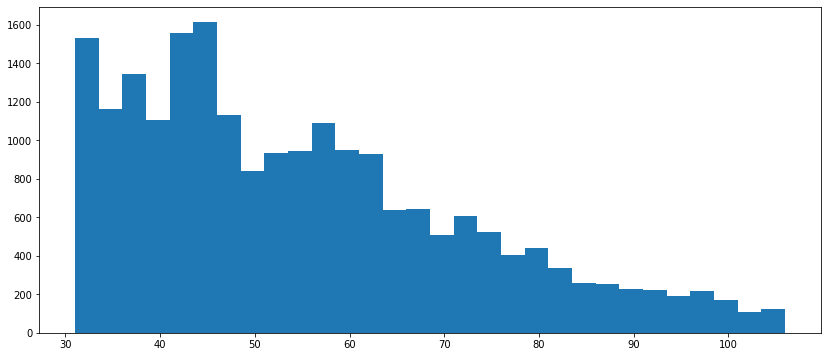

living_area


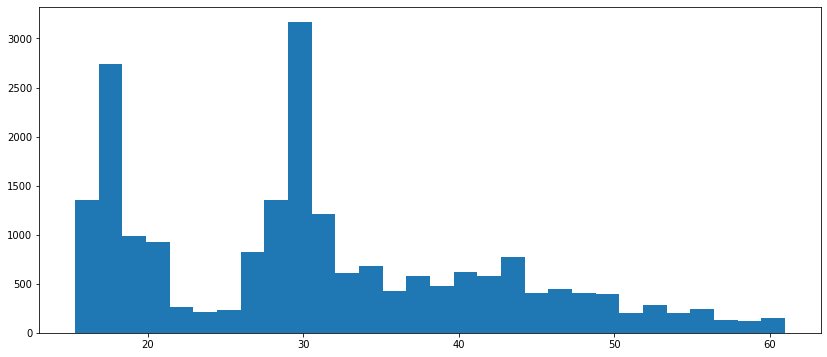

kitchen_area


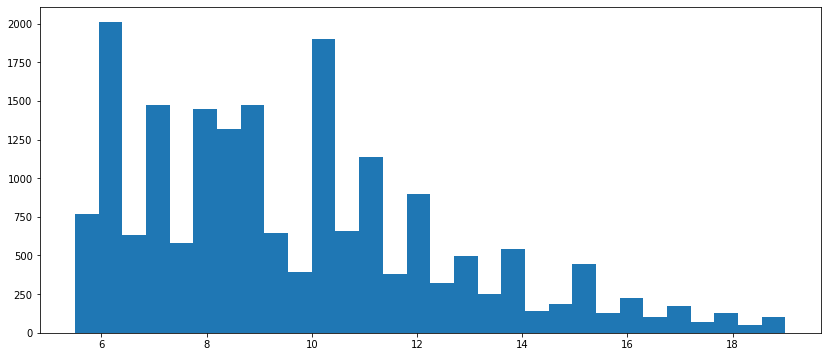

last_price


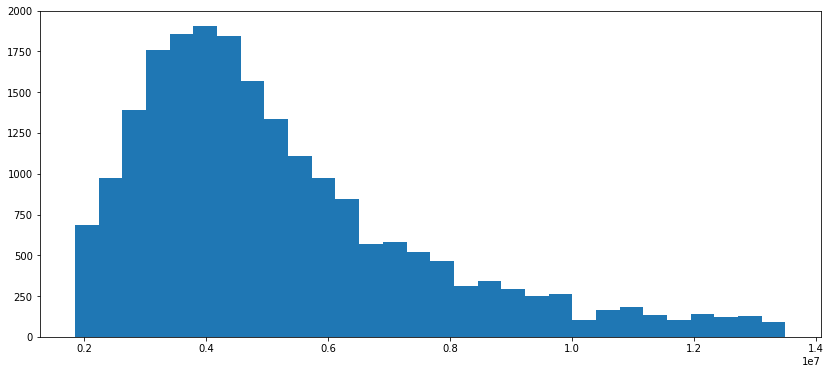

rooms


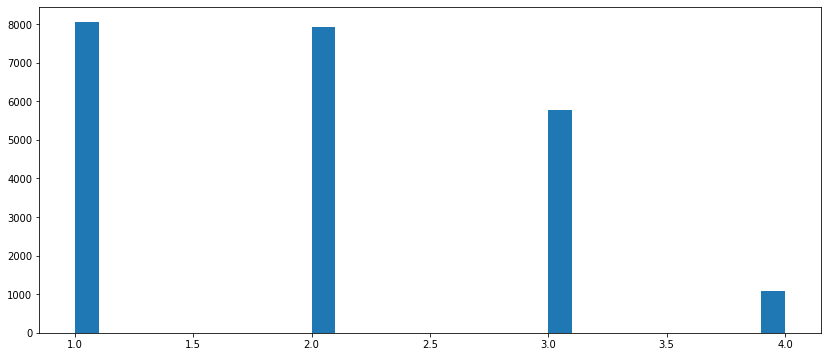

ceiling_height


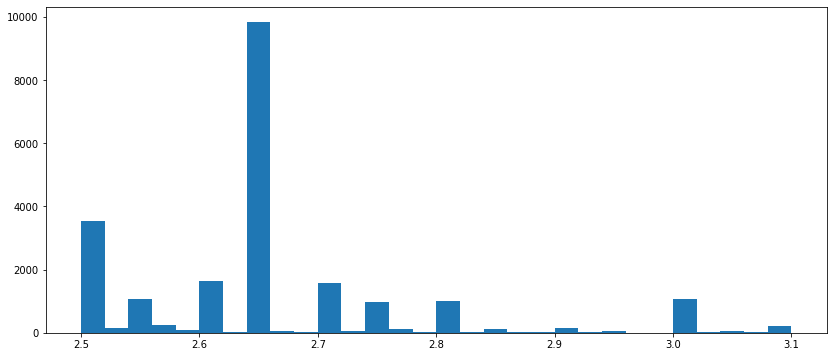

floor


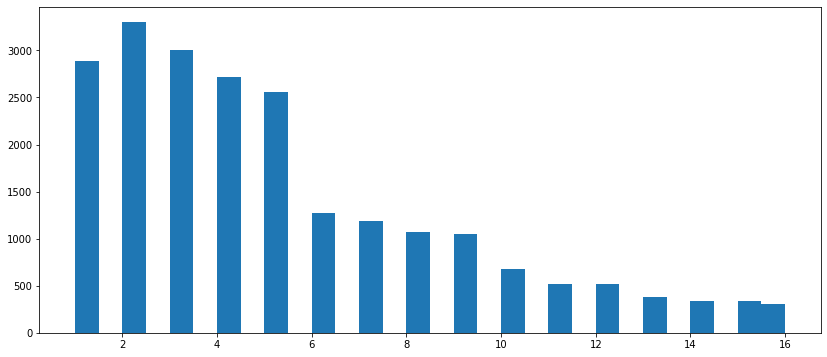

floor_type


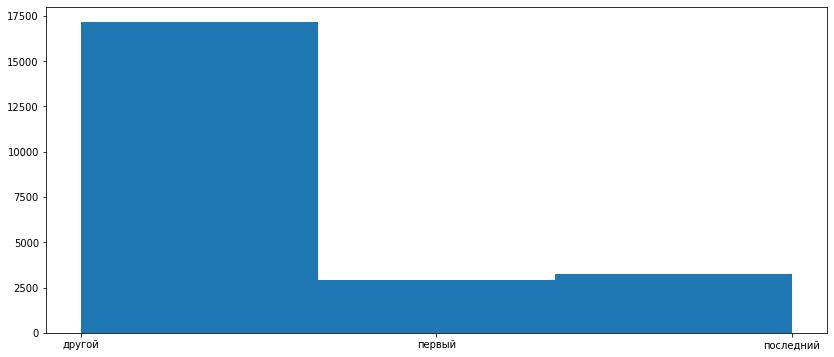

floors_total


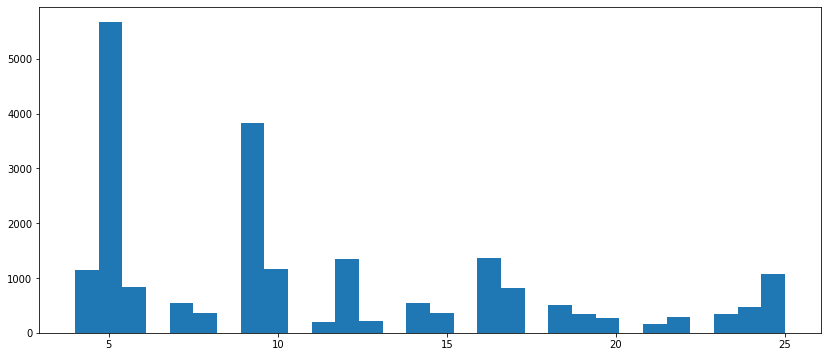

cityCenters_nearest


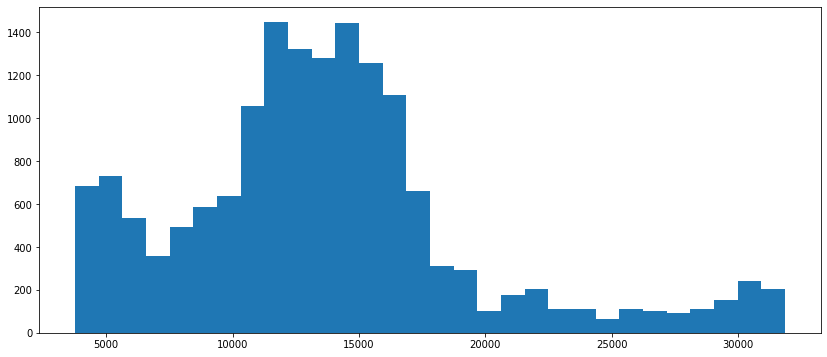

airports_nearest


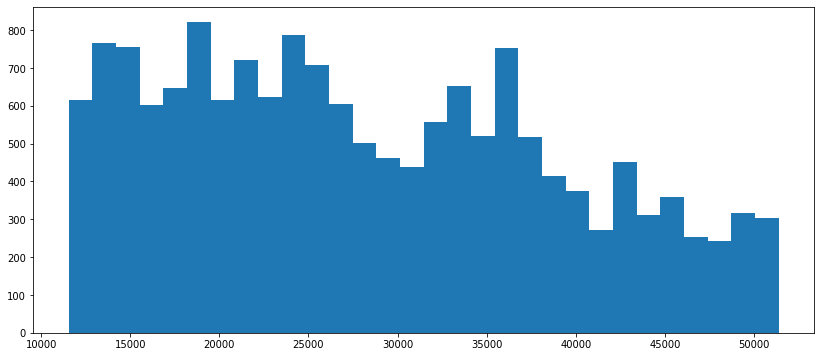

parks_nearest


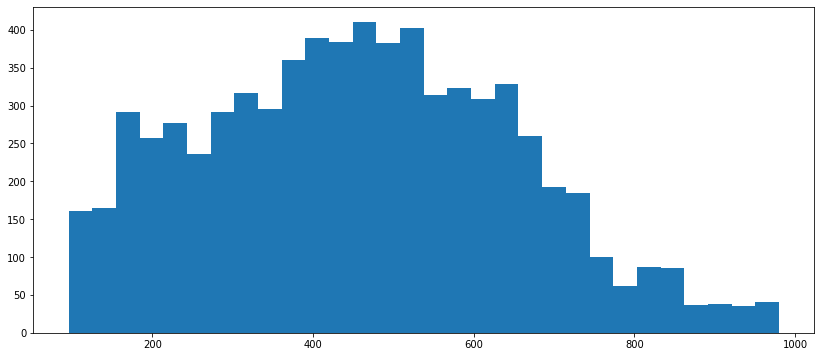

day_of_week_publish


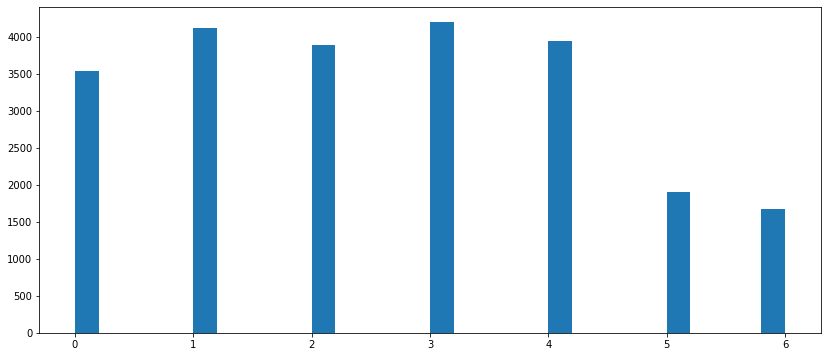

month_publish


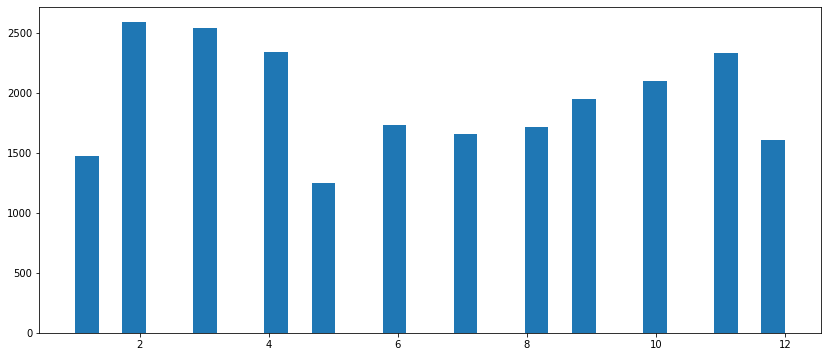

In [26]:
# Провожу анализ следующих данных
to_analyze = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_type',\
             'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'day_of_week_publish', 'month_publish']

for i in to_analyze:
    print(f'{i}')
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            plt.figure(figsize=(14,6))
            plt.hist(x = df[i], bins=30, range=(df[i].quantile(0.05), df[i].quantile(0.95)))
            plt.show()
    else:
            plt.figure(figsize=(14,6))
            plt.hist(x = df[i], bins=3)
            plt.show()

Вывод: Изучив данные графики, можно сделать следующие заключения об основных тенденциях:

        Площади квартир от 30 м2 до 50 м2;
        Жилая площадь в основном составляет 30м2 (даже с учетом заполнений пропущенных значений медианой, роли сильно не меняет, поскольку процент пропущеных составляет около 9%);
        Размер кухни варьируется от 6 до 10 м2;
        Цена квартиры 4 милиона;
        В основном преобладают однокомнатные и двухкомнатные;
        Высота потолка составляет около 2.64м;
        Преобладают квартиры до 5-ого этажа в домах до 10-ти этажей;
        В среднем до центра 15 км;
        Растояния до аэропортов распределены равномерно (до 40 км);
        Парки в полукилометровой доступности;
        Обьявления выкладывают в основном в будние дни;
        Пик обьявлений приходится на холодную половину года (исключая декабрь и январь)      

count    20200.000000
mean       178.645099
std        217.661753
min          1.000000
25%         44.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

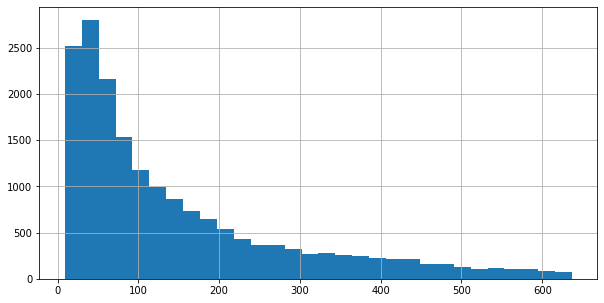

In [27]:
# Обрезаю квантили, чтобы убрать выбросы по столбцу дней
df['days_exposition'].hist(bins=30, range=(df['days_exposition'].quantile(0.05),\
                                           df['days_exposition'].quantile(0.95)),\
                                          figsize=(10,5))
df['days_exposition'].describe()

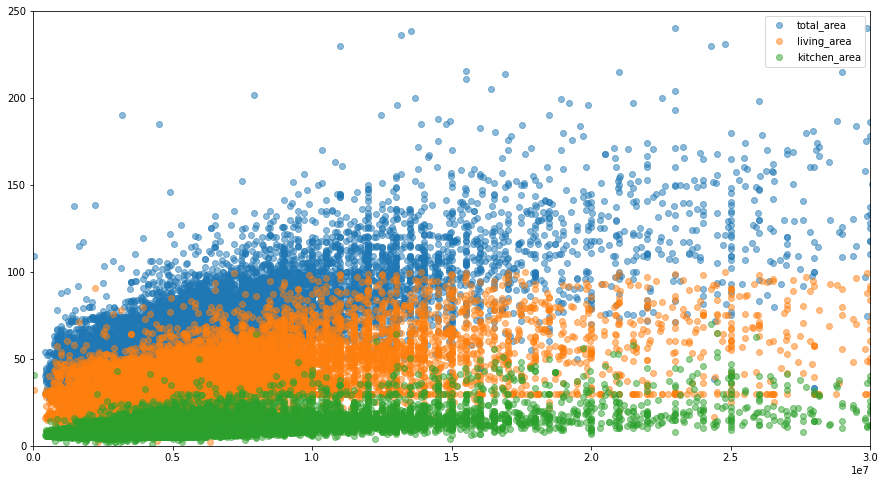

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.759873,0.581680,0.592143
total_area,0.759873,1.000000,0.827702,0.562170
living_area,0.581680,0.827702,1.000000,0.291139
kitchen_area,0.592143,0.562170,0.291139,1.000000


In [28]:
# Проверяю влияет ли стоимость от площадей и получаю процент корреляции
analize = ['total_area', 'living_area', 'kitchen_area']
fig, ax = plt.subplots(figsize=(15,8))
for i in analize:
    plt.scatter(x=df['last_price'], y=df[i], alpha=0.5, label=i)
    plt.plot()
plt.ylim(0,250)
plt.xlim(0,30000000)
ax.legend()
plt.show()
df[['last_price', 'total_area', 'living_area', 'kitchen_area']].corr()

<Figure size 432x288 with 0 Axes>

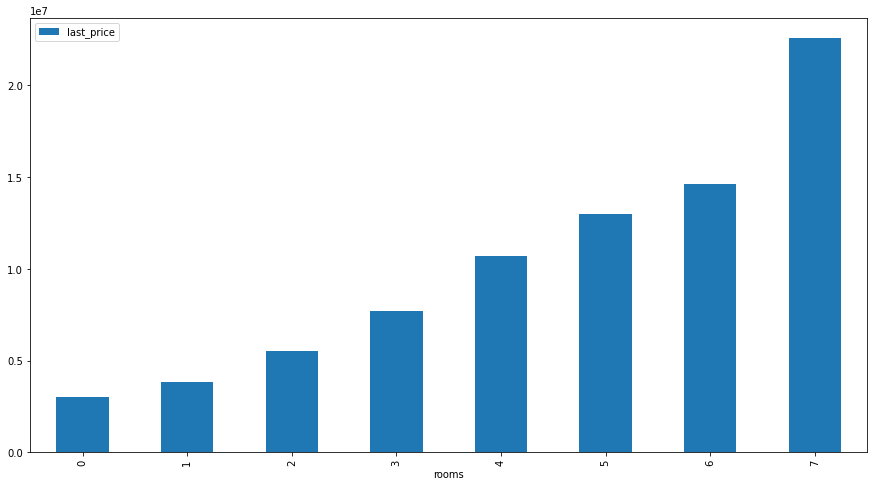

0.44863563775367565

In [29]:
# Проверяю влияет ли стоимость от кол-ва комнат и получаю процент корреляции
plt.figure()
ax=df.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(15,8))
plt.show()
df['last_price'].corr(df['rooms'])

<Figure size 432x288 with 0 Axes>

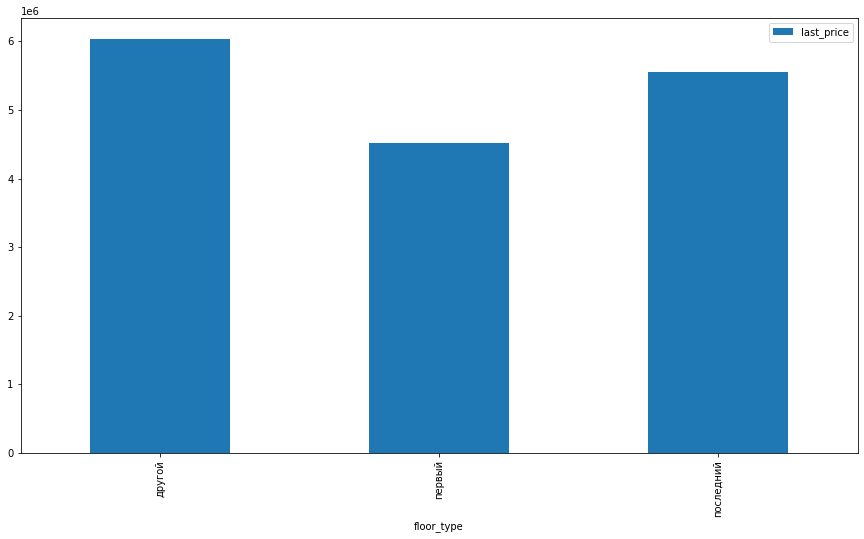

In [30]:
# Проверяю влияет ли стоимость от того, где находится квартира
plt.figure()
ax=df.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(15,8))
plt.show()

<Figure size 432x288 with 0 Axes>

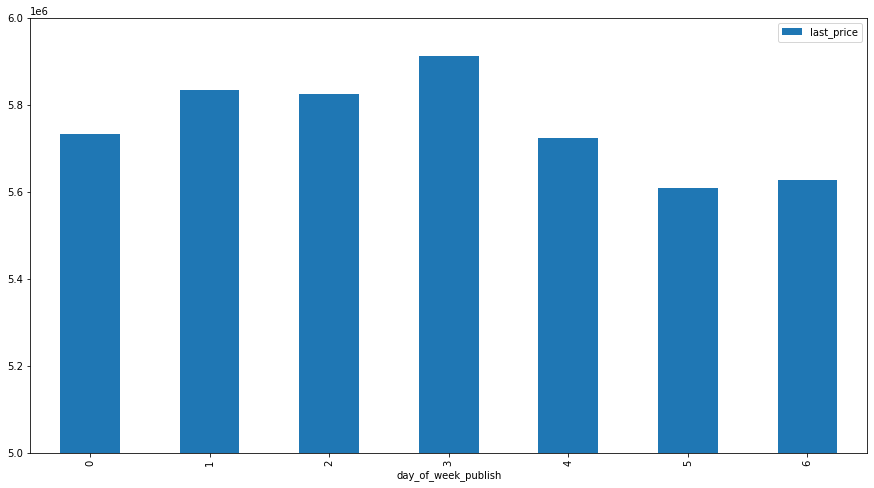

In [31]:
# Проверяю влияет ли стоимость от того, в какой день было выложено обьявление
plt.figure()
ax=df.pivot_table(index='day_of_week_publish', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(15,8))
plt.ylim(5000000,6000000)
plt.show()

<Figure size 432x288 with 0 Axes>

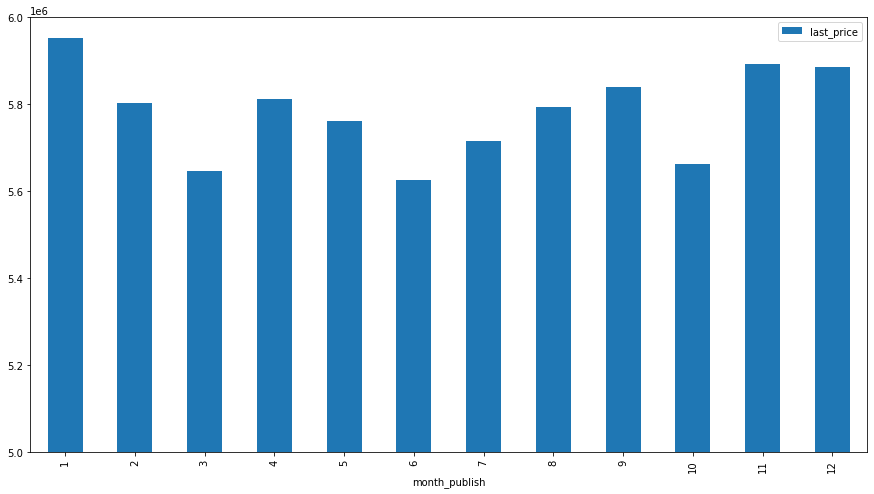

In [32]:
# Проверяю влияет ли стоимость от того, в какой месяц было выложено обьявление
plt.figure()
ax=df.pivot_table(index='month_publish', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(15,8))
plt.ylim(5000000,6000000)
plt.show()

<Figure size 432x288 with 0 Axes>

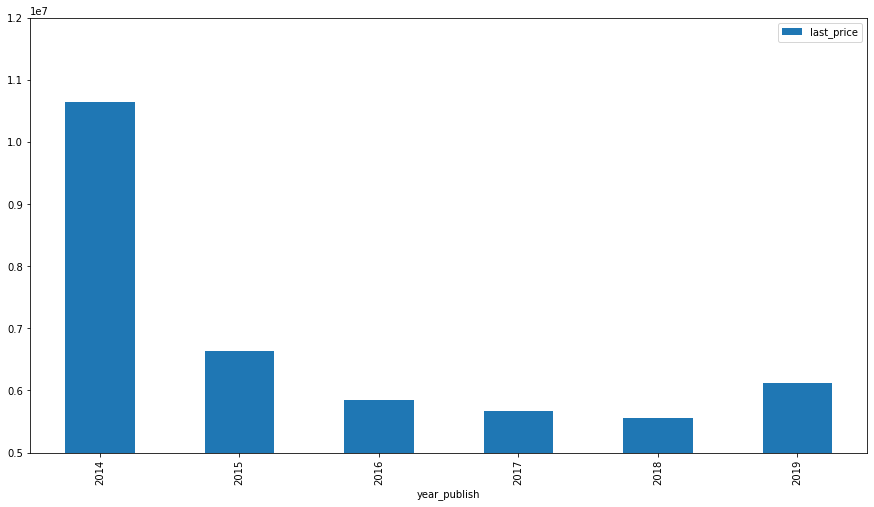

In [33]:
# Проверяю влияет ли стоимость от того, в какой год было выложено обьявление
plt.figure()
ax=df.pivot_table(index='year_publish', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(15,8))
plt.ylim(5000000,12000000)
plt.show()

Вывод: Главный параметр, который изучаю, является цена квартиры. От цены квартиру, я расматриваю зависимости и делаю следующие заключения:

Рост цен зависит от роста площади квартир (включая жилые площади и площади кухни)

Рост цен также зависит от количества комнат в квартире

Наиболее дешевые квартиры находятся на первом этаже. Далее по возрастанию идут квартиры на последнем этаже и самыми дорогими являются промежуточные этажи.

Цена не сильно зависит от дня публикации обьявления, но из наблюдений: Обьявления о дешевых квартир выкладываются в выходные. Самые дорогие обьявления квартир приходятся на ноябрь, декабрь, январь. Самые же дешевые на март, июнь, октябрь. Самые дорогие обьявления были выложены в 2014 году, самые дешевые в 2018.

In [34]:
# Подвожу выводы
local_mean_m2 = df.pivot_table(index='locality_name', values='price_m2', aggfunc=['mean', 'count']).\
sort_values(('count', 'price_m2'), ascending=False)
local_mean_m2.columns = ['price_m2', 'count']
local_mean_m2['price_m2'] = round(local_mean_m2['price_m2']).astype('int')
print(local_mean_m2.head(10))
print()
print('Самый дорогой квадратный метр в Санкт-Петербурге')
print()
print('Самый дешевый квадратный метр в Выборге')

                   price_m2  count
locality_name                     
Санкт-Петербург      213723  15313
поселок Мурино       170019    556
поселок Шушары       154993    440
Всеволожск           132969    398
Пушкин               192964    364
Колпино              132172    337
поселок Парголово    197705    327
Гатчина              121411    306
деревня Кудрово      183394    299
Выборг                99559    235

Самый дорогой квадратный метр в Санкт-Петербурге

Самый дешевый квадратный метр в Выборге


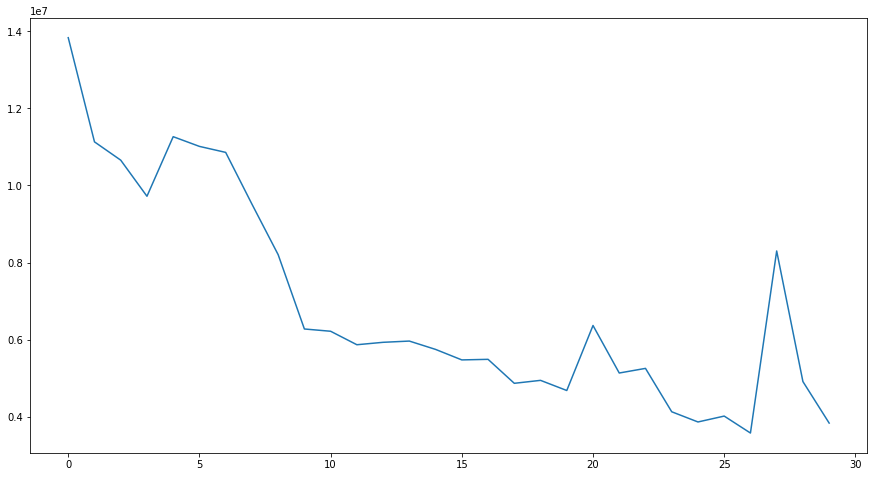

In [36]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(df.query("locality_name == 'Санкт-Петербург'").pivot_table(index='cityCenters_nearest_km', values='last_price'))
#plt.ylim(3000000,14000000)
plt.show()   

Вывод: Дорогое жилье заканчивается на 7-ом километре от Питера. Далее идут варианты подешевле. Всплески на графике на 20 и на 27 км, полагаю, что богатые районы, где сдаются уже не квартиры а дома.

### Общий вывод

Вывод: 
1) Наиболее дорогие квартиры находятся в Санкт-Петербурге и уменьшаются по мере их отдаления от второй столицы России

2) Меньше всего стоят квартиры которые расположены на первом этаже

3) В основном площадь квартир составляют от 30 до 50 квадратных метров с потолками до 2.7 метров

4) Преобладают квартиры в домах не больше десяти этажей